<a href="https://colab.research.google.com/github/sigvehaug/CAS-Applied-Data-Science/blob/master/M1_D2_DV_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook 2, Module 1, Data Aquisition and Data Management, CAS Applied Data Science, 2021-08-26, S. Haug, University of Bern. 

**First some cells from the discussion session in the morning.**

1. Wenn leaving a colab session, files you have saved locally will disappear. So it is better to use your google drive for files you want to keep. For that you need to mount google drive to the machine were the colab session is running: 

In [6]:
# Using files from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#!ls -l drive/MyDrive # listing the files in my google drive

# 1. Visualisation of Data - Examples

**Learning outcomes:**

Participants will be able to make good data science plots, with praxis on 
- plot line charts from series and dataframes
- plot histograms
  - understand the effect of binning
- plot scatter plots
- plot box plots
- plot error bars
- formatting of plots
- geoplotting

**Introduction Slides**
- https://docs.google.com/presentation/d/1HhRIIVq46DyVNm68WeTqr_vZvOgSMWBZa2XDwWNH8H4/edit?usp=sharing

**Further sources**
- Python: https://pandas.pydata.org/pandas-docs/stable/visualization.html
- https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
- Get inspired here : https://matplotlib.org/gallery/index.html

Here you have examples on plotting possibilities with pandas. They make data science plotting very easy and fast. However, you may have special needs that are not supported. Then you can use the underlaying plotting module **matplotlib**. 

Plotting is an art and you can spend enourmous amounts of time doing plotting. There are many types of plots. You may invent your own type. We only show some examples and point out some important things. If you need to go further, you have to work indepentently. 

Some vocabulary and plots are only understandable with corresponding statistics background. This is part of module 2. 

### 0. Load the modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Plot line charts (time series)

First we use the data structure Series (one dimensional).

In [ ]:
# Generate 1000 random numbers for 1000 days from the normal distribution
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.head(15)
#ts.plot()
#plt.show()

2000-01-01    0.282843
2000-01-02    0.237125
2000-01-03   -0.603880
2000-01-04   -0.306337
2000-01-05   -0.569256
2000-01-06   -3.036002
2000-01-07   -1.857734
2000-01-08   -1.783718
2000-01-09   -2.291305
2000-01-10   -3.675831
2000-01-11   -2.393675
2000-01-12   -0.493525
2000-01-13    0.855146
2000-01-14    0.560412
2000-01-15   -1.629776
Freq: D, dtype: float64

We can generate 4 time series, keep them in a dataframe and plot them all four. 

<Figure size 432x288 with 0 Axes>

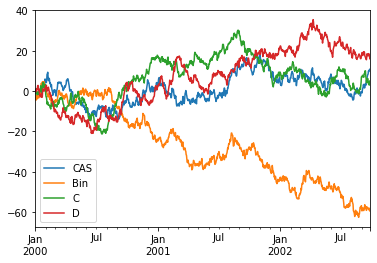

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['CAS','Bin','C','D'])
df_cumsum = df.cumsum()
plt.figure()
df_cumsum.plot()
plt.show()

### 2. Plot histograms (frequency plots)

For this we use our Iris dataset.

In [15]:
filepath = '/content/drive/MyDrive/CAS/CAS-ADS-2021/iris.csv' # adapt this to your path
df = pd.read_csv(filepath,names=['slength','swidth','plength','pwidth','species']) # data type is a string (str), i.e. not converted into numbers
df.head() # print first 5 lines of data

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Plot two histograms with a legend in the same graph.

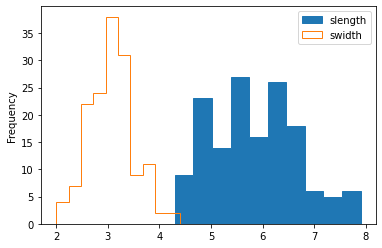

In [16]:
df['slength'].plot(kind="hist",fill=True,histtype='step',label='slength')
df['swidth'].plot(kind="hist",fill=False,histtype='step',label='swidth')
plt.legend()
plt.show()

### The effect of binning

When data is binned (or sampled) the bin size effects the amount of counts in each bin. Counts fluctuate like a normal distribution for counts above about 20. So depending on your bin size, the same data may look differently.

Hard binning (small bin size) may introduce pure statistical structures without any other meaning. This is then overfitting. Too big bin sizes may wipe out structures in the data (underfitting). If known, a bin size guided by the physical resolution of the sensor is close to optimal. 

Plot the same histograms with a different binning. 

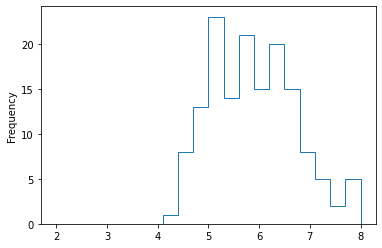

In [17]:
df['slength'].plot(bins=20,range=(2,8), kind="hist",fill=False,histtype='step')
plt.show()

### Always label the axes (also with units)

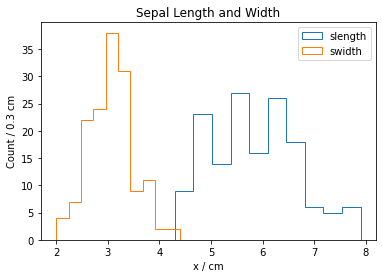

In [18]:
ax = df['slength'].plot(kind="hist",fill=False,histtype='step',label='slength')
df['swidth'].plot(kind="hist",fill=False,histtype='step',label='swidth')
ax.set_xlabel('x / cm')
ax.set_ylabel('Count / 0.3 cm')
ax.set_title('Sepal Length and Width')
plt.legend()
plt.show()

In [19]:
s_df = df[df['species']=='Iris-setosa']

### 3. Scatter plots

Scatter plots show how the data is distributed in two dimensions. They are good for finding (anti) correlations between two variables. We plot several plots in one figure.

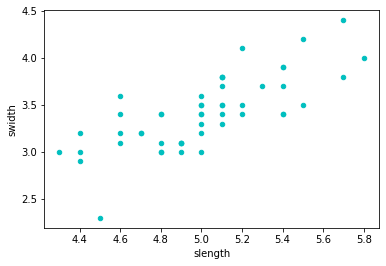

In [20]:
s_df.plot(x='slength',y='swidth',kind="scatter",c='c')
plt.show()

With the plotting module there are some nice tools. For example authomatic plotting of all scatter plots.

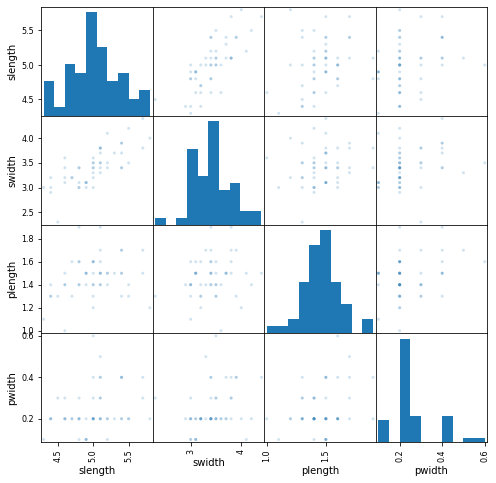

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[df['species']=='Iris-setosa'], alpha=0.2, figsize=(8, 8), diagonal='hist')
plt.show()

Or plotting of Andrew curves. https://en.wikipedia.org/wiki/Andrews_plot

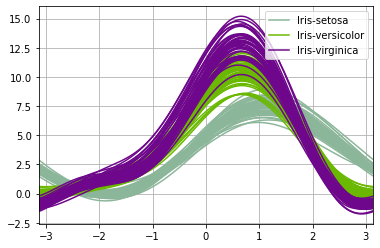

In [22]:
from pandas.plotting import andrews_curves
andrews_curves(df, 'species')
plt.show()

There are several other tools too. See https://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4. Box plots

Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), or DataFrame.boxplot() to visualize the distribution of values within each column.

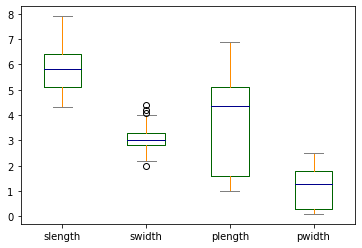

In [23]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
             medians='DarkBlue', caps='Gray')
df.plot.box(color=color)
#df.plot.box(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
plt.show()

Box plots are non-parametric. The box shows the first second and third quartiles. The whiskers may be standard deviations or other percentiles.

### 5. Plotting with error bars

There is no science without error bars, or better, uncertainties. The meaning of uncertainties is discussed in module 2. Here we only show by example  how to plot uncertainties.

Plotting with error bars is supported in DataFrame.plot() and Series.plot().

Horizontal and vertical error bars can be supplied to the xerr and yerr keyword arguments to plot(). The error values can be specified using a variety of formats:

- As a DataFrame or dict of errors with column names matching the columns attribute of the plotting DataFrame or matching the name attribute of the Series.
- As a str indicating which of the columns of plotting DataFrame contain the error values.
- As raw values (list, tuple, or np.ndarray). Must be the same length as the plotting DataFrame/Series.

Asymmetrical error bars are also supported, however raw error values must be provided in this case. For a M length Series, a Mx2 array should be provided indicating lower and upper (or left and right) errors. For a MxN DataFrame, asymmetrical errors should be in a Mx2xN array.

Here is an example using an error dataframe (symmetric uncertainties).

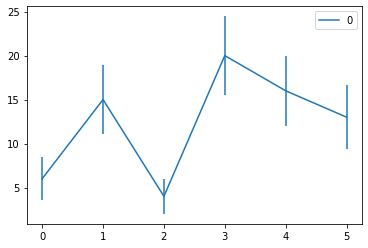

In [24]:
my_df   = pd.DataFrame([6,15,4,20,16,13]) # Some random data
my_df_e = (my_df)**0.5 # The error dataframe
my_df.plot(yerr=my_df_e)
plt.show()

### 6. Formatting plots 

Plots can easily be formatted with keywords. One can adjust colors, types of shading, lines, axes, legends, titles, etc. Some formatting has been exemplified above. More examples are in the documentation. https://pandas.pydata.org/pandas-docs/stable/visualization.html

With the matplotlib module you are even more flexible. See https://matplotlib.org/gallery/index.html for inspirations.

### 7. Summary

- Do you remember three important plot types?
- What can the binning of a histogram do to the interpretation of it?
- What are the three parts of the general communication process?
- Can you mention three important points to include in plots and their figure legends?


### 8 Plotting Geodata

Often is very nice to visualise data on geographical maps. Fortunately people have written packages helpin us with that. This is an example how the geopandas package can be used. 

You need to install geopandas (if you use Anaconda, the Anaconda Navigator in the environment you are using. Geopandas is part repository/channel conda-forge). This you may do at home or now or just follow Sigve showing you this example on colab. 

First we need some data files. On Linux (colab is running linux) or MacOs you can do this in order to have the files in a subfolder data of your current notebook folder:


In [ ]:
! wget http://biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip 
! mkdir -p data 
! unzip CHE_adm.zip -d data 
#! cd data 
#! unzip CHE_adm.zip

--2021-08-25 16:31:21--  http://biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip [following]
--2021-08-25 16:31:22--  https://biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip [following]
--2021-08-25 16:31:22--  https://data.biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3559904 (3.4M) [application/

In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (1,552 kB/s)
Selecting previously unselected

In [ ]:

! ls -l data/

total 15060
-rw-r--r-- 1 root root       5 Aug 11  2015 CHE_adm0.cpg
-rw-r--r-- 1 root root    1284 Aug 11  2015 CHE_adm0.csv
-rw-r--r-- 1 root root    5685 Aug 11  2015 CHE_adm0.dbf
-rw-r--r-- 1 root root     145 Aug 11  2015 CHE_adm0.prj
-rw-r--r-- 1 root root  208876 Aug 11  2015 CHE_adm0.shp
-rw-r--r-- 1 root root     108 Aug 11  2015 CHE_adm0.shx
-rw-r--r-- 1 root root       5 Aug 11  2015 CHE_adm1.cpg
-rw-r--r-- 1 root root    3131 Aug 11  2015 CHE_adm1.csv
-rw-r--r-- 1 root root   12646 Aug 11  2015 CHE_adm1.dbf
-rw-r--r-- 1 root root     145 Aug 11  2015 CHE_adm1.prj
-rw-r--r-- 1 root root  781896 Aug 11  2015 CHE_adm1.shp
-rw-r--r-- 1 root root     308 Aug 11  2015 CHE_adm1.shx
-rw-r--r-- 1 root root       5 Aug 11  2015 CHE_adm2.cpg
-rw-r--r-- 1 root root   14495 Aug 11  2015 CHE_adm2.csv
-rw-r--r-- 1 root root   99082 Aug 11  2015 CHE_adm2.dbf
-rw-r--r-- 1 root root     145 Aug 11  2015 CHE_adm2.prj
-rw-r--r-- 1 root root 1757444 Aug 11  2015 CHE_adm2.shp
-rw-r--r-- 1 root r

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import os


In [ ]:
! ls -l drive/MyDrive/CAS/CAS-ADS-2021/cantons.csv

total 3
-rw------- 1 root root 619 Aug 25 16:20 cantons.csv
-rw------- 1 root root 151 Aug 18 09:00 CAS-2021.gsheet
-rw------- 1 root root 151 Aug 24 17:04 CAS-ADS-M1-D1-2021.gslides
-rw------- 1 root root 151 Aug 23 16:44 CAS-ADS-M1-D1-2021-Intro.gslides


In [ ]:
fp = "data/CHE_adm1.shp"
map_df = gpd.read_file(fp)
cantons_df = pd.read_csv("drive/MyDrive/CAS/CAS-ADS-2021/cantons.csv")
#cantons_df
merged_df = map_df.merge(cantons_df, how="left", left_on="NAME_1", right_on="CANTON")
merged_df

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,CANTON,ACR,INHABITANTS,VIRUSCASESCONFIRMED
0,223,CHE,Switzerland,1,Aargau,Canton|Kanton|Chantun,Canton,None,Argovia|Arg¢via|Argovie,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ...",Aargau,AG,677387,26
1,223,CHE,Switzerland,2,Appenzell Ausserrhoden,Canton|Kanton|Chantun,Canton,None,Appenzell Ausser-Rhoden|Appenzell Outer Rhodes...,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ...",Appenzell Ausserrhoden,AR,55234,3
2,223,CHE,Switzerland,3,Appenzell Innerrhoden,Canton|Kanton|Chantun,Canton,None,Appenzell Inner-Rhoden|Appenzell Inner Rhodes|...,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3...",Appenzell Innerrhoden,AI,16145,0
3,223,CHE,Switzerland,4,Basel-Landschaft,Canton|Kanton|Chantun,Canton,None,Bâle-Campagne|Basel-Country|Baselland|Basel-La...,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4...",Basel-Landschaft,BL,288132,41
4,223,CHE,Switzerland,5,Basel-Stadt,Canton|Kanton|Chantun,Canton,None,Bâle-Ville|Basel-City|Basel-Town|Basilea-Citad...,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ...",Basel-Stadt,BS,194766,100
5,223,CHE,Switzerland,6,Bern,Canton|Kanton|Chantun,Canton,None,Berna|Berne,"MULTIPOLYGON (((7.09284 46.89419, 7.09202 46.8...",Bern,BE,1034977,69
6,223,CHE,Switzerland,7,Fribourg,Canton|Kanton|Chantun,Canton,None,Freiburg|Friburg|Friburgo,"MULTIPOLYGON (((6.78581 46.74974, 6.78684 46.7...",Fribourg,FR,318714,31
7,223,CHE,Switzerland,8,Genève,Canton|Kanton|Chantun,Canton,None,Cenevre|Genebra|Geneve|Geneva|Genevra|Genf|Gin...,"MULTIPOLYGON (((6.18406 46.34775, 6.18559 46.3...",Genève,GE,499480,103
8,223,CHE,Switzerland,9,Glarus,Canton|Kanton|Chantun,Canton,None,Glaris|Glarona|Glaruna,"POLYGON ((9.07083 47.13050, 9.07307 47.12995, ...",Glarus,GL,40403,3
9,223,CHE,Switzerland,10,Graubünden,Canton|Kanton|Chantun,Canton,None,Graubünden|Grigioni|Grischun|Grisons,"MULTIPOLYGON (((10.22766 46.61207, 10.22734 46...",Graubünden,GR,198379,43


   ACR  VIRUSCASESDENSITY
0   AG           0.003838
1   AR           0.005431
2   AI           0.000000
3   BL           0.014230
4   BS           0.051344
5   BE           0.006667
6   FR           0.009727
7   GE           0.020621
8   GL           0.007425
9   GR           0.021676
10  JU           0.009534
11  LU           0.002197
12  NE           0.021487
13  NW           0.000000
14  OW           0.002643
15  SG           0.003151
16  SH           0.001220
17  SZ           0.007539
18  SO           0.002196
19  TG           0.001447
20  TI           0.070753
21  UR           0.000000
22  VS           0.012502
23  VD           0.031784
24  ZH           0.007824
25  ZG           0.006307


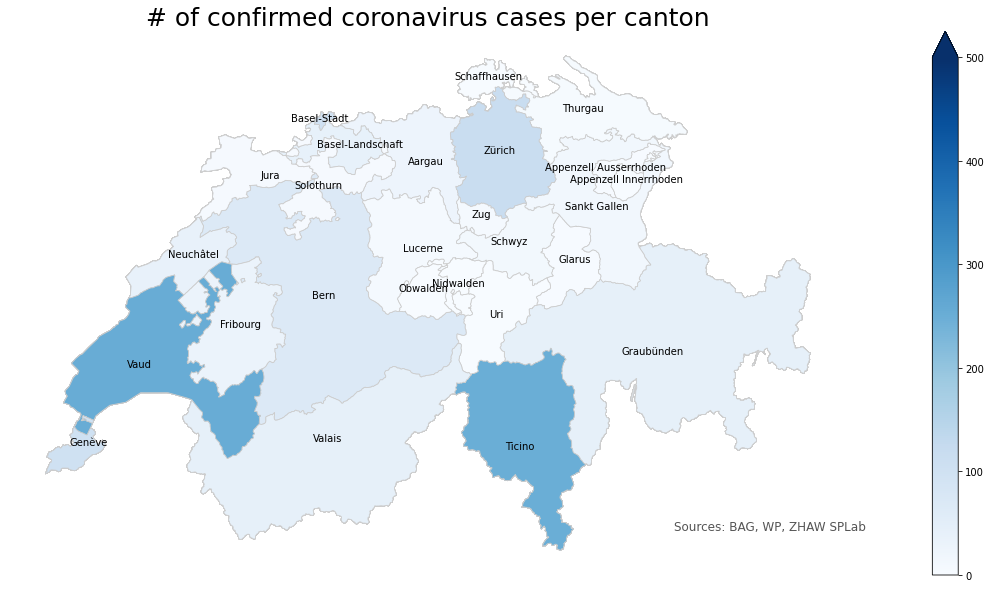

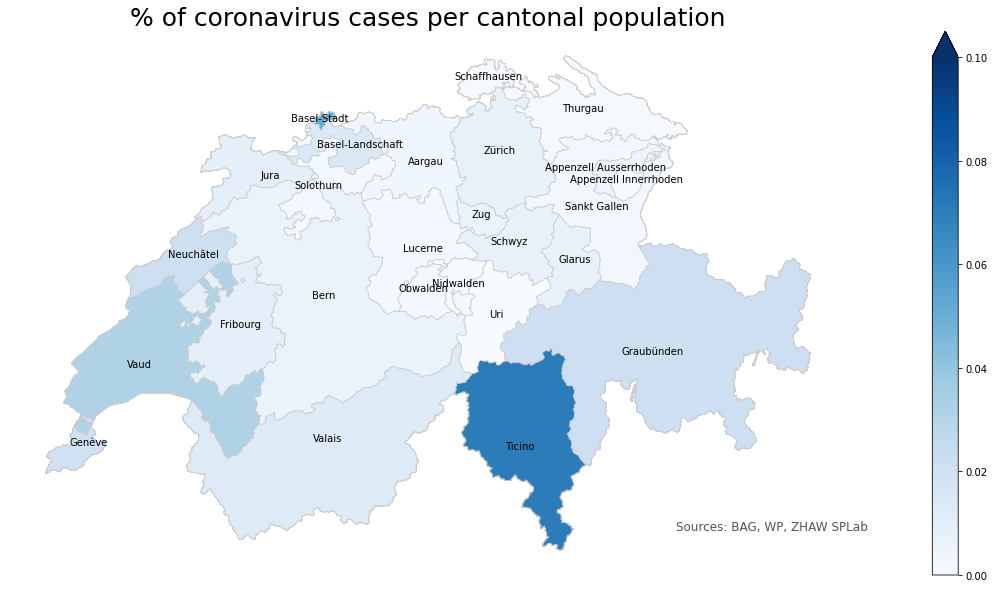

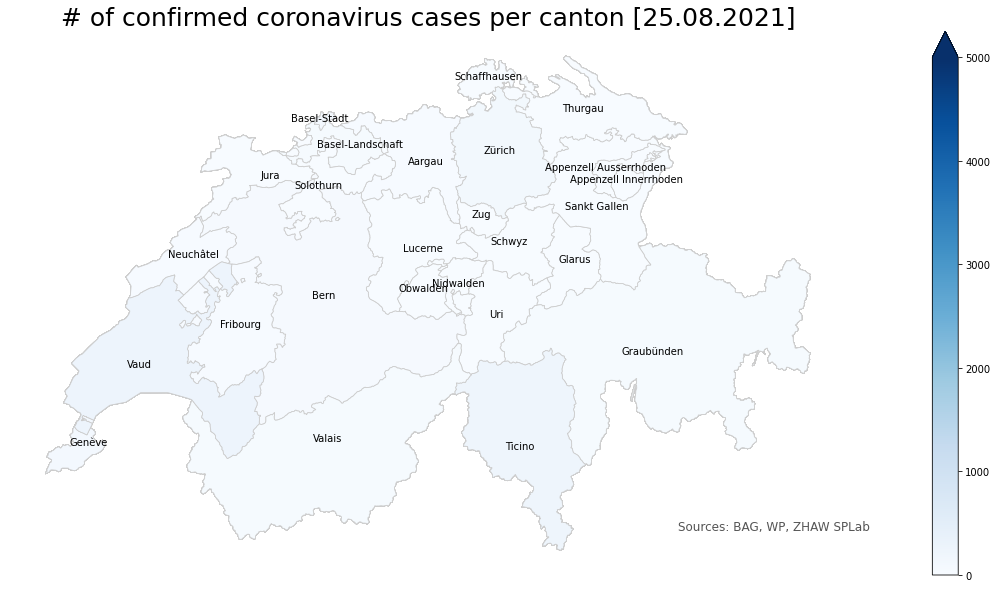

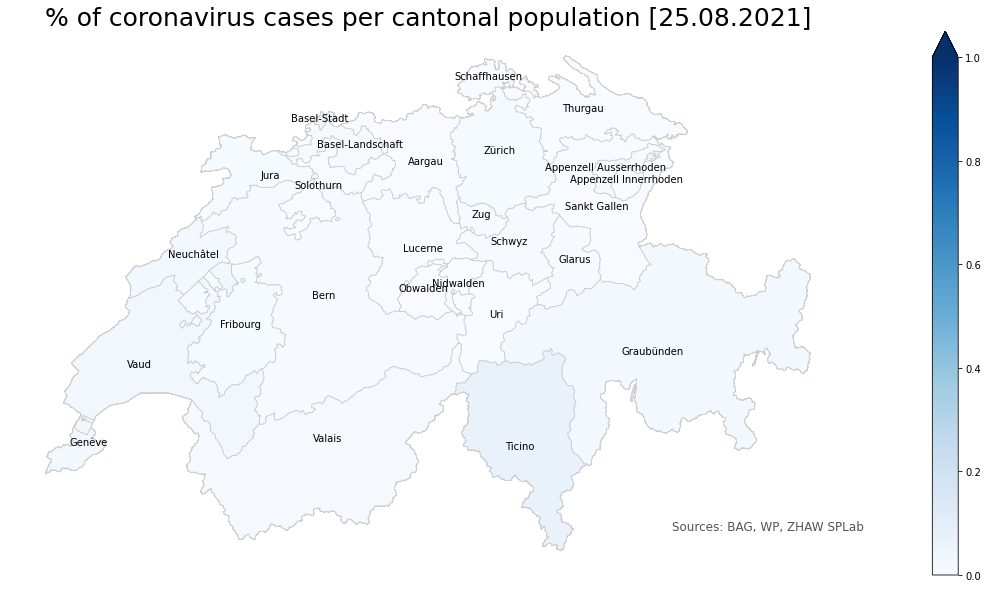

In [ ]:
def plotmap(df, datacol, vmax, filename, title):
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=vmax))
    fig, ax = plt.subplots(1, figsize=(30, 10))
    ax.axis("off") 
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'}) 
    ax.annotate("Sources: BAG, WP, ZHAW SPLab", xy=(0.68, 0.11), 
    xycoords='figure fraction', fontsize=12, color='#555555')
    sm.set_array([])
    fig.colorbar(sm, ax=ax, extend="max")
    df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:]) 
    df['coords'] = [coords[0] for coords in df['coords']]
    for idx, row in df.iterrows():
        plt.annotate(s=row['NAME_1'], xy=row['coords'],horizontalalignment='center') 
        df.plot(column=datacol, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', vmax=vmax) 
    fig.savefig(filename, dpi=150)

merged_df["VIRUSCASESDENSITY"] = 100 * merged_df["VIRUSCASESCONFIRMED"] / merged_df["INHABITANTS"]
print(merged_df[["ACR", "VIRUSCASESDENSITY"]])
if not os.path.isfile("map_absolute.png"):
    plotmap(merged_df, "VIRUSCASESCONFIRMED", 500, "map_absolute.png", "# of confirmed coronavirus cases per canton")
    plotmap(merged_df, "VIRUSCASESDENSITY", 0.1, "map_density.png", "% of coronavirus cases per cantonal population")

os.makedirs("dailymaps", exist_ok=True)
stamp = datetime.datetime.now().strftime("%Y%m%d")
hdate = datetime.datetime.now().strftime("%d.%m.%Y")

plotmap(merged_df, "VIRUSCASESCONFIRMED", 5000, f"dailymaps/map_abs_{stamp}.png", f"# of confirmed coronavirus cases per canton [{hdate}]")
plotmap(merged_df, "VIRUSCASESDENSITY", 1, f"dailymaps/map_den_{stamp}.png", f"% of coronavirus cases per cantonal population [{hdate}]")

# End of the prepared data visualisation examples. 

Feel free to play on your own. You should make some good plots of your dataset for the project report.